# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [45]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [57]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100


reviews = []


# for i in range(1, pages + 1):
for i in range(1, pages + 1):
    rating = []
    category = []
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    print(url)
    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
 
    print(f"   ---> {len(reviews)} total reviews")


Scraping page 1
https://www.airlinequality.com/airline-reviews/british-airways/page/1/?sortby=post_date%3ADesc&pagesize=100
   ---> 100 total reviews
Scraping page 2
https://www.airlinequality.com/airline-reviews/british-airways/page/2/?sortby=post_date%3ADesc&pagesize=100
   ---> 200 total reviews
Scraping page 3
https://www.airlinequality.com/airline-reviews/british-airways/page/3/?sortby=post_date%3ADesc&pagesize=100
   ---> 300 total reviews
Scraping page 4
https://www.airlinequality.com/airline-reviews/british-airways/page/4/?sortby=post_date%3ADesc&pagesize=100
   ---> 400 total reviews
Scraping page 5
https://www.airlinequality.com/airline-reviews/british-airways/page/5/?sortby=post_date%3ADesc&pagesize=100
   ---> 500 total reviews
Scraping page 6
https://www.airlinequality.com/airline-reviews/british-airways/page/6/?sortby=post_date%3ADesc&pagesize=100
   ---> 600 total reviews
Scraping page 7
https://www.airlinequality.com/airline-reviews/british-airways/page/7/?sortby=post_d

# Steps
1-Cleaning the text

2-Tokenization
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

3-Enrichment – POS tagging
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

4-Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

5-Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

6-Sentiment Analysis using VADER
ADER stands for Valence Aware Dictionary and Sentiment Reasoner.
Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [58]:
df = pd.DataFrame()
df["reviews"] = reviews
df['reviews'][0]

'Not Verified |  They changed our Flights from Brussels to London Heathrow to LAX on 4/16/2023. We paid extra to choose our seats. Since they cancelled they never honored the seat that we bought, they seated us in totally different seats. I asked the check in employee, she was very rude and told us that we have to understand that was a different flight. From London to LAX was worse, nobody in the airport help us. Employees from BA told us that we have to return next day for our flight we can rent a hotel or go terminal 3 and sleep there. Finally one employee help us and gives a voucher for hotel. It was a nightmare this airline. We missed one day work and BA didn’t return the money that we paid for our previous chosen seats.'

In [59]:
df.reviews= df.reviews.str.split('|',expand=True)[1]
df

,reviews
0,They changed our Flights from Brussels to Lo...
1,At Copenhagen the most chaotic ticket counte...
2,Worst experience of my life trying to deal w...
3,Due to code sharing with Cathay Pacific I wa...
4,LHR check in was quick at the First Wing and...
...,...
995,Linate to London. The morning of the departu...
996,Flew British Airways from JK to London Heathr...
997,I have flown British Airways numerous times o...
998,We can not fault the new 'Club World' food an...


In [63]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,Unnamed: 0,reviews,Cleaned Reviews
0,0,They changed our Flights from Brussels to Lo...,They changed our Flights from Brussels to Lon...
1,1,At Copenhagen the most chaotic ticket counte...,At Copenhagen the most chaotic ticket counter...
2,2,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...
3,3,Due to code sharing with Cathay Pacific I wa...,Due to code sharing with Cathay Pacific I was...
4,4,LHR check in was quick at the First Wing and...,LHR check in was quick at the First Wing and ...


In [64]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yassin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yassin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yassin\AppData\Roaming\nltk_data...


Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).


In [65]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Yassin\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Yassin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,Unnamed: 0,reviews,Cleaned Reviews,POS tagged
0,0,They changed our Flights from Brussels to Lo...,They changed our Flights from Brussels to Lon...,"[(changed, v), (Flights, n), (Brussels, n), (L..."
1,1,At Copenhagen the most chaotic ticket counte...,At Copenhagen the most chaotic ticket counter...,"[(Copenhagen, n), (chaotic, a), (ticket, n), (..."
2,2,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...,"[(Worst, n), (experience, n), (life, n), (tryi..."
3,3,Due to code sharing with Cathay Pacific I wa...,Due to code sharing with Cathay Pacific I was...,"[(Due, a), (code, v), (sharing, v), (Cathay, n..."
4,4,LHR check in was quick at the First Wing and...,LHR check in was quick at the First Wing and ...,"[(LHR, n), (check, n), (quick, a), (First, n),..."


In [66]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,Unnamed: 0,reviews,Cleaned Reviews,POS tagged,Lemma
0,0,They changed our Flights from Brussels to Lo...,They changed our Flights from Brussels to Lon...,"[(changed, v), (Flights, n), (Brussels, n), (L...",change Flights Brussels London Heathrow LAX ...
1,1,At Copenhagen the most chaotic ticket counte...,At Copenhagen the most chaotic ticket counter...,"[(Copenhagen, n), (chaotic, a), (ticket, n), (...",Copenhagen chaotic ticket counter assignment...
2,2,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...,"[(Worst, n), (experience, n), (life, n), (tryi...",Worst experience life try deal customer serv...
3,3,Due to code sharing with Cathay Pacific I wa...,Due to code sharing with Cathay Pacific I was...,"[(Due, a), (code, v), (sharing, v), (Cathay, n...",Due code share Cathay Pacific downgrade BA r...
4,4,LHR check in was quick at the First Wing and...,LHR check in was quick at the First Wing and ...,"[(LHR, n), (check, n), (quick, a), (First, n),...",LHR check quick First Wing quickly security ...


In [67]:
df[['reviews','Lemma']]

,reviews,Lemma
0,They changed our Flights from Brussels to Lo...,change Flights Brussels London Heathrow LAX ...
1,At Copenhagen the most chaotic ticket counte...,Copenhagen chaotic ticket counter assignment...
2,Worst experience of my life trying to deal w...,Worst experience life try deal customer serv...
3,Due to code sharing with Cathay Pacific I wa...,Due code share Cathay Pacific downgrade BA r...
4,LHR check in was quick at the First Wing and...,LHR check quick First Wing quickly security ...
...,...,...
995,Linate to London. The morning of the departu...,Linate London morning departure receive emai...
996,Flew British Airways from JK to London Heathr...,Flew British Airways JK London Heathrow conn...
997,I have flown British Airways numerous times o...,fly British Airways numerous time many year ...
998,We can not fault the new 'Club World' food an...,fault new Club World food service outbound i...


In [68]:
!pip install vaderSentiment

     ------------------------------------ 126.0/126.0 kB 337.3 kB/s eta 0:00:00


In [69]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,Unnamed: 0,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,0,They changed our Flights from Brussels to Lo...,They changed our Flights from Brussels to Lon...,"[(changed, v), (Flights, n), (Brussels, n), (L...",change Flights Brussels London Heathrow LAX ...,-0.7980,Negative
1,1,At Copenhagen the most chaotic ticket counte...,At Copenhagen the most chaotic ticket counter...,"[(Copenhagen, n), (chaotic, a), (ticket, n), (...",Copenhagen chaotic ticket counter assignment...,-0.0516,Negative
2,2,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...,"[(Worst, n), (experience, n), (life, n), (tryi...",Worst experience life try deal customer serv...,-0.9324,Negative
3,3,Due to code sharing with Cathay Pacific I wa...,Due to code sharing with Cathay Pacific I was...,"[(Due, a), (code, v), (sharing, v), (Cathay, n...",Due code share Cathay Pacific downgrade BA r...,-0.5369,Negative
4,4,LHR check in was quick at the First Wing and...,LHR check in was quick at the First Wing and ...,"[(LHR, n), (check, n), (quick, a), (First, n),...",LHR check quick First Wing quickly security ...,0.9454,Positive


In [71]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    523
Negative    372
Neutral     105
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x1b85226acd0>,
 [Text(-0.07941315564527114, 1.0971296872797036, 'Positive'),
  Text(-0.2802477560251644, -1.0637016476638832, 'Negative'),
  Text(1.2772152593917465, -0.43728844162277347, 'Neutral')],
 [Text(-0.04331626671560244, 0.5984343748798382, '52.3%'),
  Text(-0.1528624123773624, -0.5802008987257544, '37.2%'),
  Text(0.8041725707281367, -0.27532975954026473, '10.5%')])

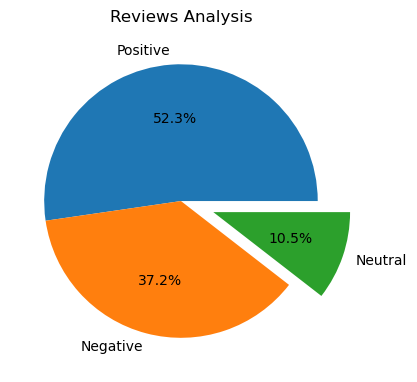

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [73]:
df.to_csv("BA_reviews.csv")

In [77]:
!python -m pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 1.5 MB/s eta 0:00:00


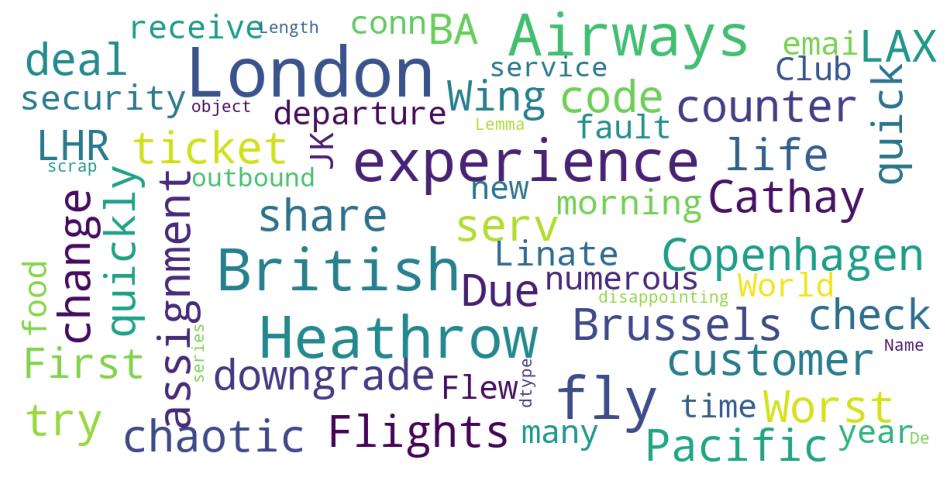

In [78]:
#Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for
#visualizing the tags or keywords from the websites


from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)